<a href="https://colab.research.google.com/github/Siddarth305/Cartooning-an-Image-using-OpenCV-Python/blob/main/Cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

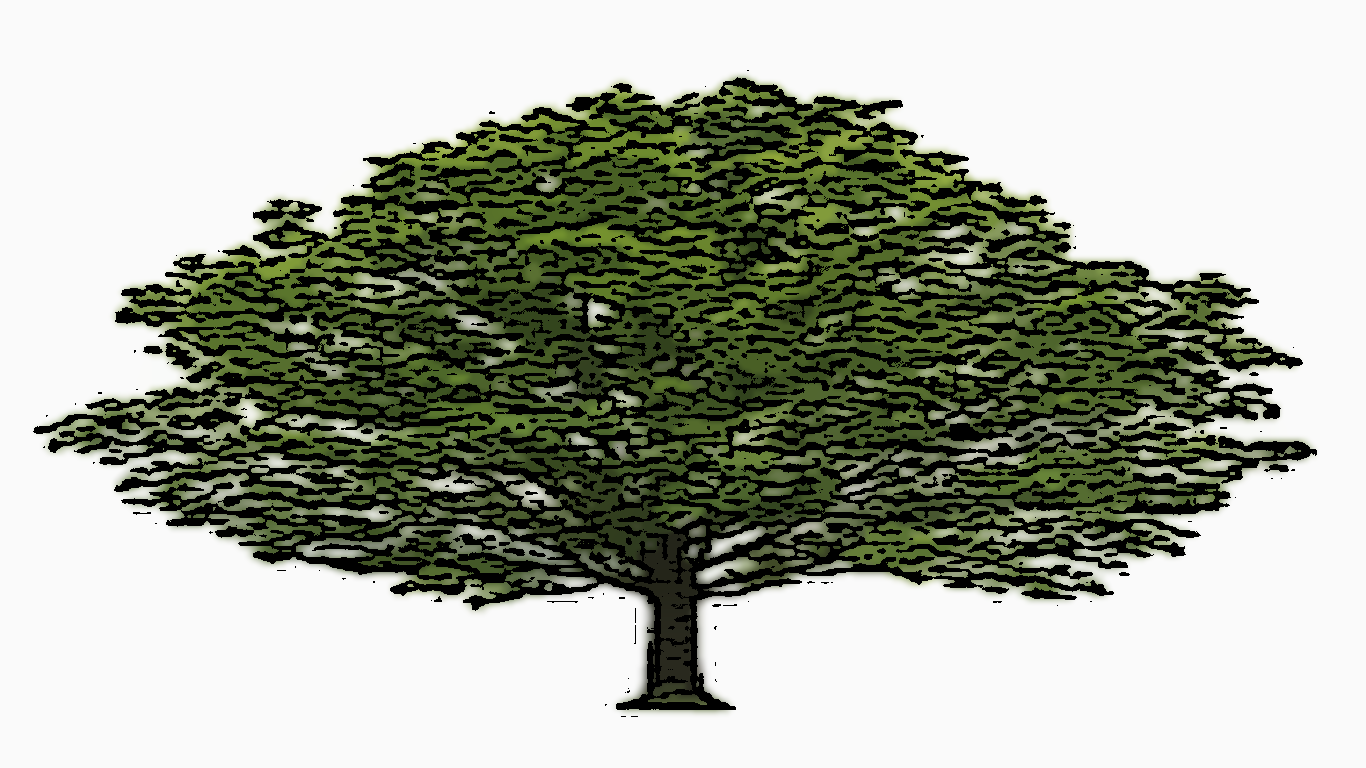

In [6]:
import cv2
from google.colab.patches import cv2_imshow

class Cartoonizer:
    """Cartoonizer effect
    A class that applies a cartoon effect to an image.
    The class uses a bilateral filter and adaptive thresholding to create
    a cartoon effect.
    """
    def __init__(self):
        pass

    def render(self, img_path):
        img_rgb = cv2.imread(img_path)
        if img_rgb is None:
            raise ValueError(f"Error loading image: {img_path}. Check if the file exists.")

        img_rgb = cv2.resize(img_rgb, (1366, 768))
        num_down_samples = 2  # Downscaling steps
        num_bilateral_filters = 50  # Bilateral filtering steps

        # -- STEP 1: Downsampling image using Gaussian pyramid --
        img_color = img_rgb.copy()
        for _ in range(num_down_samples):
            img_color = cv2.pyrDown(img_color)

        # Apply bilateral filter multiple times
        for _ in range(num_bilateral_filters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

        # Upsample back to original size & ensure it matches input
        for _ in range(num_down_samples):
            img_color = cv2.pyrUp(img_color)
        img_color = cv2.resize(img_color, (1366, 768))  # Ensure exact match

        # -- STEP 2 & 3: Convert to grayscale and apply median blur --
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)

        # -- STEP 4: Edge detection using adaptive thresholding --
        img_edge = cv2.adaptiveThreshold(
            img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2
        )

        # Resize edges to match original image size and convert to color
        img_edge = cv2.resize(img_edge, (1366, 768))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2BGR)

        # -- STEP 5: Combine edge mask with color image --
        cartoon_img = cv2.bitwise_and(img_color, img_edge)

        return cartoon_img

# Upload file if needed
from google.colab import files

file_name = "/content/sample_data/Screenshort.png"  # Ensure this file exists

try:
    tmp_canvas = Cartoonizer()
    result = tmp_canvas.render(file_name)

    # Save and display the output
    cv2.imwrite("/content/Cartoon_version.jpg", result)
    cv2_imshow(result)  # Display in Colab

except ValueError as e:
    print(e)


# New Section